In [2]:
import pandas as pd
import numpy as np

In [3]:
X_train = pd.read_csv("MNIST_train_small.csv", header = None)
y_train = X_train.iloc[:,0]
X_train = X_train.drop(X_train.columns[0], axis=1)

X_test = pd.read_csv("MNIST_test_small.csv", header = None)
y_test = X_test.iloc[:,0]
X_test = X_test.drop(X_test.columns[0], axis=1)


In [4]:
data_classes = {0:"0", 1: "1", 2: "2", 3: "3", 4: "4", 5: "5", 
                6: "6", 7: "7", 8: "8", 9: "9" }



Adding Guassian Distortion to the the DataSet

In [5]:
X = X_train
y= y_train

# Add Gaussian noise to the dataset
noise = np.random.normal(loc=0.5, scale=0.2, size=X.shape)
X_noisy = np.clip(X + noise, 0, 1)



In [6]:
import matplotlib.pyplot as plt

def plot_examples(images, labels, row_length=5, title=""):
    nr_rows = math.floor(len(images) / row_length)
    if (len(images) % row_length) > 0:
        nr_rows += 1
    fig, axes = plt.subplots(nr_rows, row_length, figsize=(1.5 * row_length, 1.5 * nr_rows))
    for i, n in enumerate(images):
        if len(images) > row_length:
            axes[math.floor(i/row_length)][i%row_length].imshow(n.reshape(28, 28), cmap=plt.cm.gray_r)
            if labels is not None:
              axes[math.floor(i/row_length)][i%row_length].set_xlabel(data_classes[int(labels[i])])
            axes[math.floor(i/row_length)][i%row_length].set_xticks(())
            axes[math.floor(i/row_length)][i%row_length].set_yticks(())

        else:
            axes[i].imshow(n.reshape(28, 28), cmap=plt.cm.gray_r)
            if labels is not None:
              axes[i].set_xlabel(data_classes[int(labels[i])])
            axes[i].set_xticks(())
            axes[i].set_yticks(())
    fig.suptitle(title)       
    plt.show();

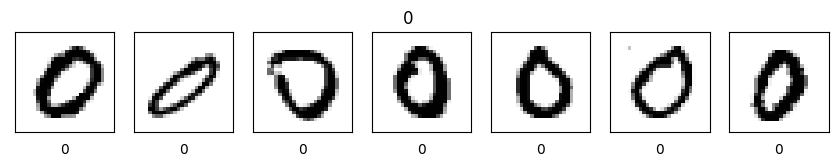

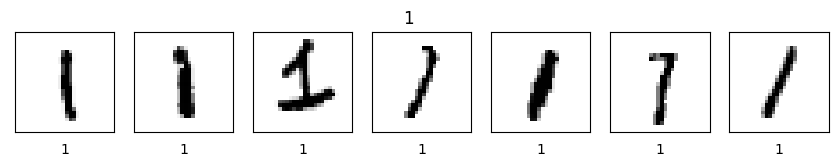

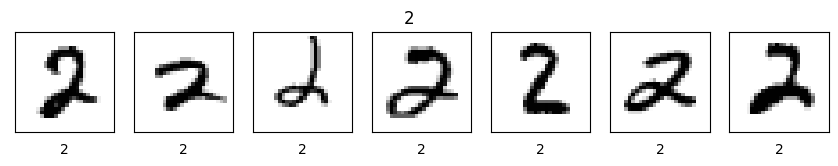

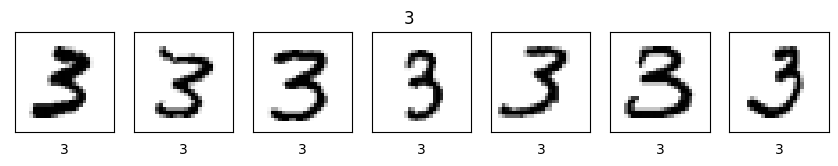

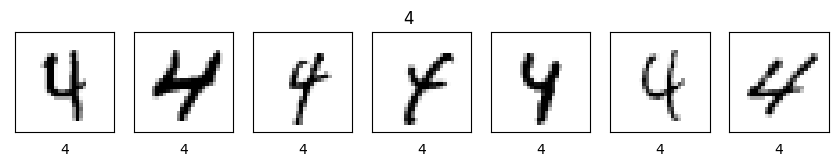

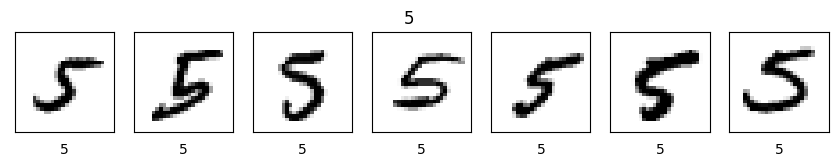

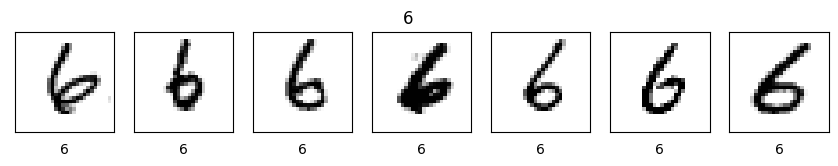

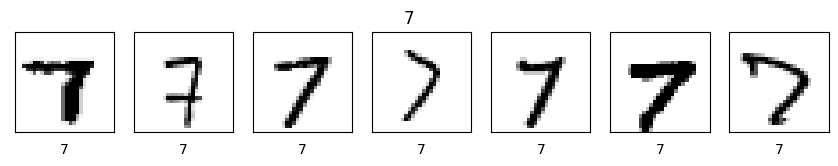

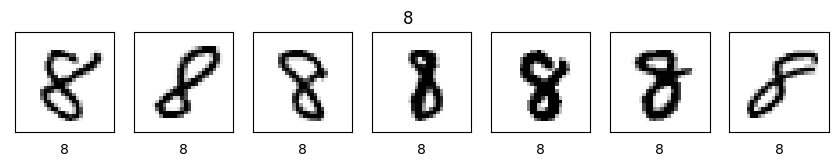

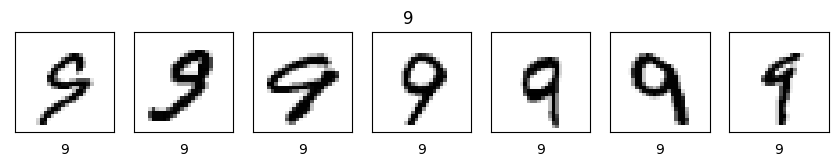

In [7]:
# Gets indices of examples with the given class

import math
def y_class(c):
    return y_train[y_train == c].index.values.tolist()[10:17]

for i in [i for i in range(10) if i != 10]:
    plot_examples(X_train.to_numpy()[y_class(i)], y_train.to_numpy()[y_class(i)], 
                  row_length=7, title=data_classes[i])

In [8]:
def euclidean_distance (vec1 , vec2):
    difvec = np.subtract(vec1, vec2) 
    sqvec = np.square(difvec)
    dist = np.sum(sqvec)
    return dist

def cheb_distance(vec1,vec2):
    max_differ = 0
    differ = abs(vec1[i] - vec2[i])
    if differ> max_differ:
        max_differ = differ
    
    return max_differ


def inner_product_distance(vec1, vec2):
    dist= 0
    dist = 1 -( np.dot(vec1,vec2)) / (np.linalg.norm(vec1)* (np.linalg.norm(vec2)))
    return dist



    
    

    

In [123]:
def predict_for_multiple_k(x, dist_function , X, y, k_values , LOOCV = False):
    dist_to_all = []

    for row, index in zip(X, y.index.values):
        dist = dist_function(x, row)
        dist_to_all.append((float(dist), int(index)))

    dist_to_all = sorted(dist_to_all, key=lambda tup: tup[0])
    
    if LOOCV:
        dist_to_all = dist_to_all[1:] + [ dist_to_all[0]]
        
    predictions = []
    for k in k_values:
        k_original = k
        neighbor_indeces = [x[1] for x in dist_to_all[:k]] 
        neighbor_classifications = y.take(neighbor_indeces) 
        closest = neighbor_classifications.mode()
        
        # In case there is a tie for a prediction , add more elements
        while len( closest ) > 1:
            k=k+1
            neighbor_indeces = [x[1] for x in dist_to_all[:k]]
            neighbor_classifications = y.take(neighbor_indeces) 
            closest = neighbor_classifications.mode()
            
        prediction = closest.iloc[0]
        predictions.append(( k_original , prediction ))
    return predictions


In [124]:
def get_accuracies(X_test, y_test, X_train, y_train, distance_function = euclidean_distance, k = [10], updates = 250):
  X_train_num = X_train.to_numpy()
  # X_train_num = X_train
  iter = 0
  correct_counters = dict([(x, {"correct": 0, "false": 0}) for x in k])
  

  for index, row in X_test.iterrows():
    preds = predict_for_multiple_k(row.to_numpy(), distance_function, X_train_num, y_train, k)
    correct = y_test.iloc[index]
    for k_val, pred in preds:
      if correct == pred:
        correct_counters[k_val]["correct"] += + 1
      else:
        correct_counters[k_val]["false"] += + 1
    iter = iter + 1
    if iter % updates == 0:
      print(f'iter: {index} {correct_counters}')
  return correct_counters

In [22]:
from sklearn.decomposition import PCA

n = 300

X_pca = PCA(n_components=70).fit_transform(X_train)
X_pca_df = pd.DataFrame(X_pca)

X_pca_N_df = PCA(n_components=70).fit_transform(X_noisy)
X_pca_N_df = pd.DataFrame(X_pca_N_df)

In [25]:
accuracies_train_ecl = get_accuracies(X_noisy, y_train, X_noisy, y_train, euclidean_distance, list(range(1,21)), 1000)
accuracies_train_ecl_pca= get_accuracies(X_pca_df, y_train, X_pca_df, y_train, euclidean_distance, list(range(1,21)), 1000)
accuracies_train_ecl_noisy_pca= get_accuracies(X_pca_N_df, y_train, X_pca_N_df, y_train, euclidean_distance, list(range(1,21)), 1000)

iter: 999 {1: {'correct': 1000, 'false': 0}, 2: {'correct': 952, 'false': 48}, 3: {'correct': 952, 'false': 48}, 4: {'correct': 933, 'false': 67}, 5: {'correct': 928, 'false': 72}, 6: {'correct': 927, 'false': 73}, 7: {'correct': 927, 'false': 73}, 8: {'correct': 924, 'false': 76}, 9: {'correct': 925, 'false': 75}, 10: {'correct': 922, 'false': 78}, 11: {'correct': 921, 'false': 79}, 12: {'correct': 919, 'false': 81}, 13: {'correct': 917, 'false': 83}, 14: {'correct': 915, 'false': 85}, 15: {'correct': 910, 'false': 90}, 16: {'correct': 907, 'false': 93}, 17: {'correct': 904, 'false': 96}, 18: {'correct': 902, 'false': 98}, 19: {'correct': 905, 'false': 95}, 20: {'correct': 908, 'false': 92}}
iter: 1999 {1: {'correct': 2000, 'false': 0}, 2: {'correct': 1904, 'false': 96}, 3: {'correct': 1904, 'false': 96}, 4: {'correct': 1872, 'false': 128}, 5: {'correct': 1858, 'false': 142}, 6: {'correct': 1848, 'false': 152}, 7: {'correct': 1847, 'false': 153}, 8: {'correct': 1841, 'false': 159}, 9:

In [23]:
# InnerProduct similarity
# accuracies_train__noisy_inner_prod= get_accuracies(X_noisy, y_train, X_noisy, y_train, inner_product_distance, list(range(1,21)), 1000)
accuracies_train_inner_prod_pca= get_accuracies(X_pca_df, y_train, X_pca_df, y_train, inner_product_distance, list(range(1,21)), 1000)
accuracies_train_noisy_inner_prod_pca= get_accuracies(X_pca_N_df, y_train, X_pca_N_df, y_train, inner_product_distance, list(range(1,21)), 1000)

iter: 999 {1: {'correct': 1000, 'false': 0}, 2: {'correct': 971, 'false': 29}, 3: {'correct': 971, 'false': 29}, 4: {'correct': 961, 'false': 39}, 5: {'correct': 953, 'false': 47}, 6: {'correct': 947, 'false': 53}, 7: {'correct': 945, 'false': 55}, 8: {'correct': 937, 'false': 63}, 9: {'correct': 935, 'false': 65}, 10: {'correct': 933, 'false': 67}, 11: {'correct': 934, 'false': 66}, 12: {'correct': 937, 'false': 63}, 13: {'correct': 936, 'false': 64}, 14: {'correct': 935, 'false': 65}, 15: {'correct': 936, 'false': 64}, 16: {'correct': 933, 'false': 67}, 17: {'correct': 933, 'false': 67}, 18: {'correct': 929, 'false': 71}, 19: {'correct': 929, 'false': 71}, 20: {'correct': 930, 'false': 70}}
iter: 1999 {1: {'correct': 2000, 'false': 0}, 2: {'correct': 1940, 'false': 60}, 3: {'correct': 1940, 'false': 60}, 4: {'correct': 1924, 'false': 76}, 5: {'correct': 1911, 'false': 89}, 6: {'correct': 1896, 'false': 104}, 7: {'correct': 1894, 'false': 106}, 8: {'correct': 1883, 'false': 117}, 9: {

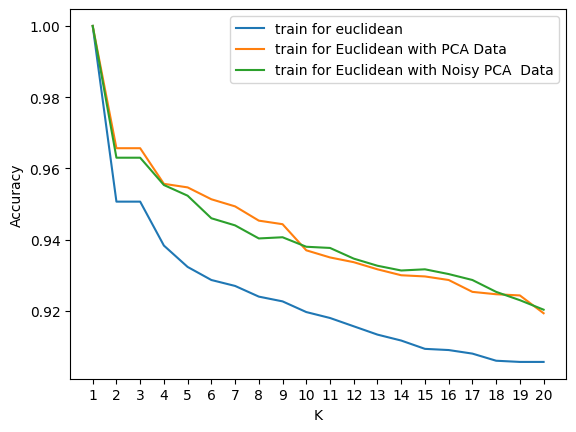

In [26]:
#noisy inner
x_val_train_ecl = [x for x in accuracies_train_ecl]
y_val_train_ecl = [float(accuracies_train_ecl[x]["correct"]) / (float(accuracies_train_ecl[x]["false"]) + float(accuracies_train_ecl[x]["correct"])) for x in accuracies_train_ecl]


#pca

# noisy inner
x_val_train_eucl_pca = [x for x in accuracies_train_ecl_pca]
y_val_train_eucl_pca = [float(accuracies_train_ecl_pca[x]["correct"]) / (float(accuracies_train_ecl_pca[x]["false"]) + float(accuracies_train_ecl_pca[x]["correct"])) for x in accuracies_train_ecl_pca]


# noisy inner PCA
x_val_train_eucl_Npca = [x for x in accuracies_train_ecl_noisy_pca]
y_val_train_eucl_Npca = [float(accuracies_train_ecl_noisy_pca[x]["correct"]) / (float(accuracies_train_ecl_noisy_pca[x]["false"]) + float(accuracies_train_ecl_noisy_pca[x]["correct"])) for x in accuracies_train_ecl_noisy_pca]


plt.plot(x_val_train_ecl, y_val_train_ecl, label = "train for euclidean ")
plt.plot(x_val_train_eucl_pca, y_val_train_eucl_pca, label = "train for Euclidean with PCA Data")
plt.plot(x_val_train_eucl_Npca, y_val_train_eucl_Npca, label = "train for Euclidean with Noisy PCA  Data")
plt.legend()
plt.ylabel("Accuracy")
plt.xlabel("K")
plt.xticks(x_val_train_inner_Npca)
plt.savefig("K_comparison.jpeg")
plt.show()

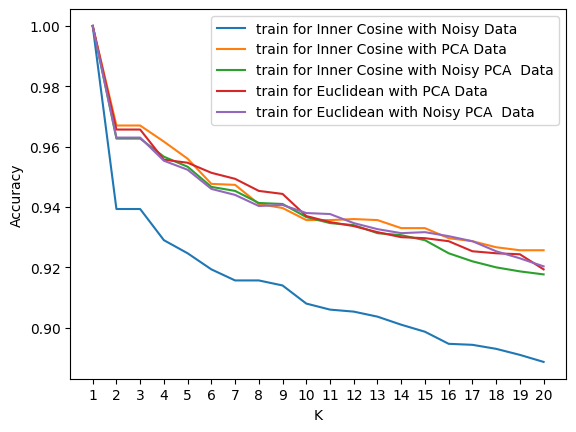

In [27]:


#noisy inner
x_val_train_inner_n = [x for x in accuracies_train__noisy_inner_prod]
y_val_train_inner_n = [float(accuracies_train__noisy_inner_prod[x]["correct"]) / (float(accuracies_train__noisy_inner_prod[x]["false"]) + float(accuracies_train__noisy_inner_prod[x]["correct"])) for x in accuracies_train__noisy_inner_prod]


#pca

# noisy inner
x_val_train_inner_pca = [x for x in accuracies_train_inner_prod_pca]
y_val_train_inner_pca = [float(accuracies_train_inner_prod_pca[x]["correct"]) / (float(accuracies_train_inner_prod_pca[x]["false"]) + float(accuracies_train_inner_prod_pca[x]["correct"])) for x in accuracies_train_inner_prod_pca]


# noisy inner PCA
x_val_train_inner_Npca = [x for x in accuracies_train_noisy_inner_prod_pca]
y_val_train_inner_Npca = [float(accuracies_train_noisy_inner_prod_pca[x]["correct"]) / (float(accuracies_train_noisy_inner_prod_pca[x]["false"]) + float(accuracies_train_noisy_inner_prod_pca[x]["correct"])) for x in accuracies_train_noisy_inner_prod_pca]


plt.plot(x_val_train_inner_n, y_val_train_inner_n, label = "train for Inner Cosine with Noisy Data")
plt.plot(x_val_train_inner_pca, y_val_train_inner_pca, label = "train for Inner Cosine with PCA Data")
plt.plot(x_val_train_inner_Npca, y_val_train_inner_Npca, label = "train for Inner Cosine with Noisy PCA  Data")
plt.plot(x_val_train_eucl_pca, y_val_train_eucl_pca, label = "train for Euclidean with PCA Data")
plt.plot(x_val_train_eucl_Npca, y_val_train_eucl_Npca, label = "train for Euclidean with Noisy PCA  Data")
plt.legend()
plt.ylabel("Accuracy")
plt.xlabel("K")
plt.xticks(x_val_train_inner_Npca)
plt.savefig("K_comparison.jpeg")
plt.show()

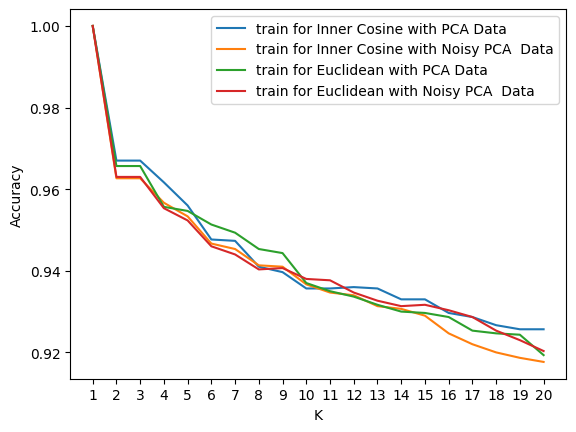

In [28]:
# plt.plot(x_val_train_inner_n, y_val_train_inner_n, label = "train for Inner Cosine with Noisy Data")
plt.plot(x_val_train_inner_pca, y_val_train_inner_pca, label = "train for Inner Cosine with PCA Data")
plt.plot(x_val_train_inner_Npca, y_val_train_inner_Npca, label = "train for Inner Cosine with Noisy PCA  Data")
plt.plot(x_val_train_eucl_pca, y_val_train_eucl_pca, label = "train for Euclidean with PCA Data")
plt.plot(x_val_train_eucl_Npca, y_val_train_eucl_Npca, label = "train for Euclidean with Noisy PCA  Data")
plt.legend()
plt.ylabel("Accuracy")
plt.xlabel("K")
plt.xticks(x_val_train_inner_Npca)
plt.savefig("K_comparison.jpeg")
plt.show()

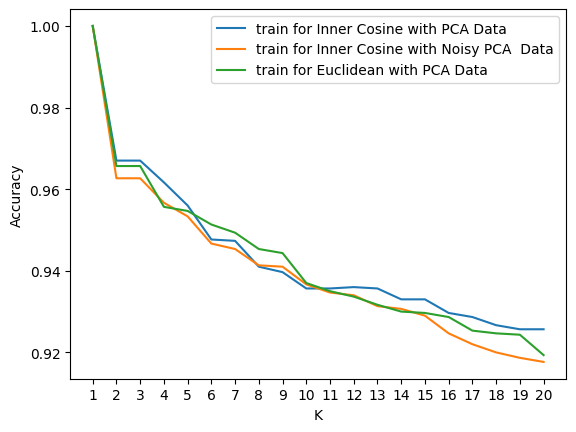

In [29]:
# plt.plot(x_val_train_inner_n, y_val_train_inner_n, label = "train for Inner Cosine with Noisy Data")
plt.plot(x_val_train_inner_pca, y_val_train_inner_pca, label = "train for Inner Cosine with PCA Data")
plt.plot(x_val_train_inner_Npca, y_val_train_inner_Npca, label = "train for Inner Cosine with Noisy PCA  Data")
plt.plot(x_val_train_eucl_pca, y_val_train_eucl_pca, label = "train for Euclidean with PCA Data")
# plt.plot(x_val_train_eucl_Npca, y_val_train_eucl_Npca, label = "train for Euclidean with Noisy PCA  Data")
plt.legend()
plt.ylabel("Accuracy")
plt.xlabel("K")
plt.xticks(x_val_train_inner_Npca)
plt.savefig("K_comparison.jpeg")
plt.show()

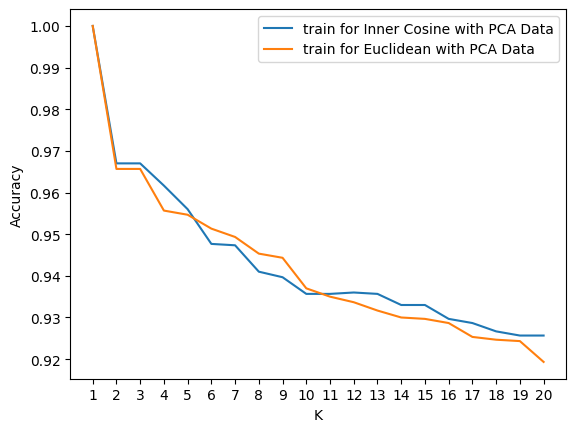

In [30]:
# plt.plot(x_val_train_inner_n, y_val_train_inner_n, label = "train for Inner Cosine with Noisy Data")
plt.plot(x_val_train_inner_pca, y_val_train_inner_pca, label = "train for Inner Cosine with PCA Data")
# plt.plot(x_val_train_inner_Npca, y_val_train_inner_Npca, label = "train for Inner Cosine with Noisy PCA  Data")
plt.plot(x_val_train_eucl_pca, y_val_train_eucl_pca, label = "train for Euclidean with PCA Data")
# plt.plot(x_val_train_eucl_Npca, y_val_train_eucl_Npca, label = "train for Euclidean with Noisy PCA  Data")
plt.legend()
plt.ylabel("Accuracy")
plt.xlabel("K")
plt.xticks(x_val_train_inner_Npca)
plt.savefig("K_comparison.jpeg")
plt.show()

In [31]:
def calc_emp_risk(accuracies):
    # Get empirical risk for each k
    empirical_risks = {}
    for k, loss in accuracies.items():
        # Get size of first item (should all be equal)
        n = sum(loss.values())

        # Calc risk
        risk = (1/n)*loss['false']
        empirical_risks[k] = risk
        
    # Get best empirical risk for k
    min_val = min(empirical_risks.values())
    optimal_k = [k for k in empirical_risks if empirical_risks[k] == min_val][0] # argmin for dict
    
    return empirical_risks, optimal_k

In [130]:
# euclidean
ecl = get_accuracies(X_train, y_train, X_train, y_train, euclidean_distance, list(range(1,21)), 1000)

X_eucl= calc_emp_risk(ecl)
X_eucl, y_eucl = zip(* sorted(X_eucl[0].items()))

#euclidean PCA
accuracies_train_ecl_pca= get_accuracies(X_pca_df, y_train, X_pca_df, y_train, euclidean_distance, list(range(1,21)), 1000)

X_eucl_PCA= calc_emp_risk(accuracies_train_ecl_pca)
X_eucl_PCA, Y_eucl_PCA = zip(* sorted(X_eucl_PCA[0].items())) 

#inner prod
inner_prod = get_accuracies(X_train, y_train, X_train, y_train, inner_product_distance, list(range(1,21)), 1000)

accuracies_inner_prod = calc_emp_risk(inner_prod)
x_inner_prod, y_inner_prod = zip(* sorted(accuracies_inner_prod[0].items())) 


#Inner Product PCA
inner_prod_pca = get_accuracies(X_pca_df, y_train, X_pca_df, y_train, inner_product_distance, list(range(1,21)), 1000)

accuracies_inner_prod_pca= calc_emp_risk(inner_prod_pca)
x_accuracies_inner_prod_pca, y_accuracies_inner_prod_pca = zip(* sorted(accuracies_inner_prod_pca[0].items())) 






iter: 999 {1: {'correct': 920, 'false': 80}, 2: {'correct': 917, 'false': 83}, 3: {'correct': 917, 'false': 83}, 4: {'correct': 919, 'false': 81}, 5: {'correct': 920, 'false': 80}, 6: {'correct': 912, 'false': 88}, 7: {'correct': 912, 'false': 88}, 8: {'correct': 912, 'false': 88}, 9: {'correct': 911, 'false': 89}, 10: {'correct': 909, 'false': 91}, 11: {'correct': 908, 'false': 92}, 12: {'correct': 905, 'false': 95}, 13: {'correct': 904, 'false': 96}, 14: {'correct': 908, 'false': 92}, 15: {'correct': 907, 'false': 93}, 16: {'correct': 904, 'false': 96}, 17: {'correct': 900, 'false': 100}, 18: {'correct': 897, 'false': 103}, 19: {'correct': 897, 'false': 103}, 20: {'correct': 896, 'false': 104}}
iter: 1999 {1: {'correct': 1846, 'false': 154}, 2: {'correct': 1846, 'false': 154}, 3: {'correct': 1846, 'false': 154}, 4: {'correct': 1837, 'false': 163}, 5: {'correct': 1841, 'false': 159}, 6: {'correct': 1835, 'false': 165}, 7: {'correct': 1835, 'false': 165}, 8: {'correct': 1823, 'false': 

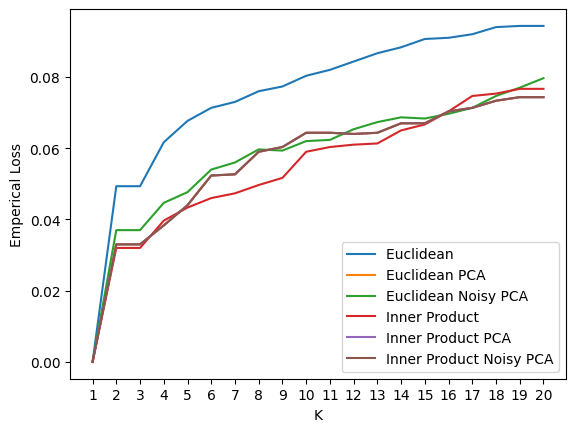

In [49]:
plt.plot(X_eucl, y_eucl, label = "Euclidean ")
plt.plot(X_eucl_PCA, Y_eucl_PCA, label = "Euclidean PCA")
plt.plot(x_eucl_N_PCA, y_eucl_N_PCA, label = "Euclidean Noisy PCA")


plt.plot(x_inner_prod, y_inner_prod, label = "Inner Product")
plt.plot(x_accuracies_inner_prod_pca, y_accuracies_inner_prod_pca, label = "Inner Product PCA")
plt.plot(x_noisy_inner_prod_pca, y_noisy_inner_prod_pca, label = "Inner Product Noisy PCA")
plt.legend()
plt.ylabel("Emperical Loss")
plt.xlabel("K")
plt.xticks(x_eucl_N_PCA)
plt.savefig("K_comparison.jpeg")
plt.show()




In [128]:
calc_emp_risk(inner_prod)[0]
a = pd.DataFrame.from_dict([calc_emp_risk(inner_prod)[0]])
a.to_excel('LOOCVInner Product Distance.xlsx')

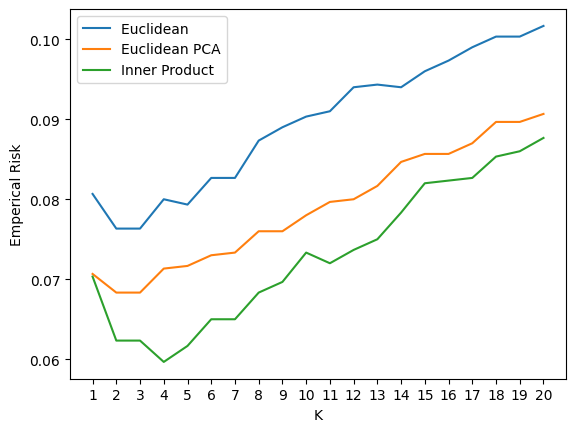

In [131]:
plt.plot(X_eucl, y_eucl, label = "Euclidean ")

plt.plot(X_eucl_PCA, Y_eucl_PCA, label = "Euclidean PCA")

plt.plot(x_inner_prod, y_inner_prod, label = "Inner Product")

# plt.plot(x_accuracies_inner_prod_pca, y_accuracies_inner_prod_pca, label = "Inner Product PCA")
plt.legend()
plt.ylabel("Emperical Risk")
plt.xlabel("K")
plt.xticks(x_eucl_N_PCA)
plt.savefig("K_comparison.jpeg")
plt.show()

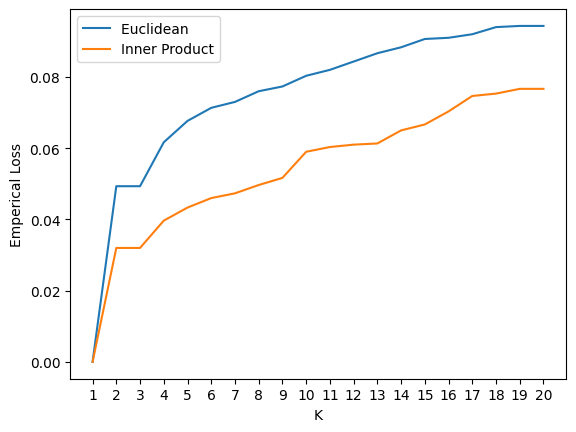

In [95]:
plt.plot(X_eucl, y_eucl, label = "Euclidean ")
# plt.plot(X_eucl_PCA, Y_eucl_PCA, label = "Euclidean PCA")
# plt.plot(X_eucl_N, y_eucl_N, label = "Euclidean Noisy")
# plt.vlines(X_eucl_N,ymin= 16,ymax=18, linestyles='--', colors='r')
plt.plot(x_inner_prod, y_inner_prod, label = "Inner Product")
# plt.plot(x_inner_prod y_eucl_N, label = "Inner Product Noisy")
# plt.plot(x_noisy_inner_prod_pca, y_noisy_inner_prod_pca, label = "Inner Product Noisy PCA")
plt.legend()
plt.ylabel("Emperical Loss")
plt.xlabel("K")
plt.xticks(x_eucl_N_PCA)
plt.savefig("K_comparison.jpeg")
plt.show()

In [ ]:
plt.plot(x_val_train_inner_pca, y_val_train_inner_pca, label = "train for Inner Cosine with PCA Data")
plt.plot(x_val_train_eucl_pca, y_val_train_eucl_pca, label = "train for Euclidean with PCA Data")
plt.legend()
plt.ylabel("Accuracy")
plt.xlabel("K")
plt.xticks(x_val_train_inner_Npca)
plt.savefig("K_comparison.jpeg")
plt.show()

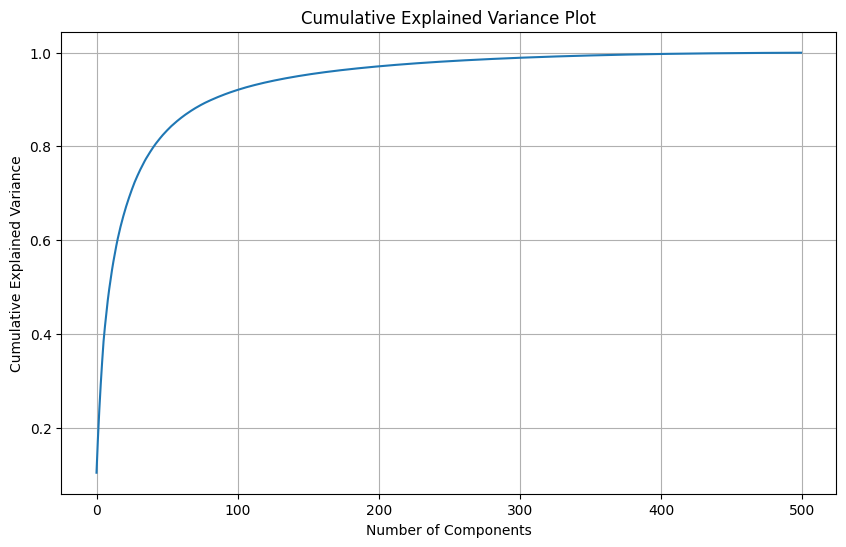

In [21]:
pca = PCA(n_components=500)
pca.fit(X_train)

# Create the cumulative explained variance plot
plt.figure(figsize=(10,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Plot')
plt.grid()
plt.show()

In [18]:
print(X.shape)
print(X_pca_df.shape)

(3000, 784)
(3000, 70)
